In [47]:
from tensorflow.keras.applications import VGG19
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras import optimizers
from tensorflow.keras import initializers
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

In [3]:
conv_base = VGG19(weights = 'imagenet', 
                  include_top = False, input_shape = (224,224,3))

In [4]:
conv_base.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [5]:
conv_base.trainable = False
#print(len(model.trainable_weights))

In [35]:
model = keras.models.Sequential()
model.add(conv_base)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(3, activation='softmax'))

In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               6422784   
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 771       
Total params: 26,447,939
Trainable params: 6,423,555
Non-trainable params: 20,024,384
_________________________________________________________________


In [37]:
train_dir = 'C:/Users/DELL/Documents/GitHub/covid-x-ray-classification/data/train'
test_dir = 'C:/Users/DELL/Documents/GitHub/covid-x-ray-classification/data/test'
dev_dir = 'C:/Users/DELL/Documents/GitHub/covid-x-ray-classification/data/validation'
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)#rescale=1./255
train_generator = train_datagen.flow_from_directory(train_dir,batch_size=16,target_size=(224, 224),
                                                    class_mode='categorical', shuffle =True, seed = 42)
dev_datagen = ImageDataGenerator(rescale=1./255)#rescale=1./255
dev_generator = dev_datagen.flow_from_directory(dev_dir, batch_size=16, target_size=(224, 224),
                                                class_mode='categorical', shuffle =True, seed = 42)
test_datagen = ImageDataGenerator(rescale=1./255)#rescale=1./255
test_generator = test_datagen.flow_from_directory(test_dir,batch_size=16,target_size=(224, 224),
                                                  class_mode='categorical', shuffle = False, seed=42)

Found 2580 images belonging to 3 classes.
Found 156 images belonging to 3 classes.
Found 169 images belonging to 3 classes.


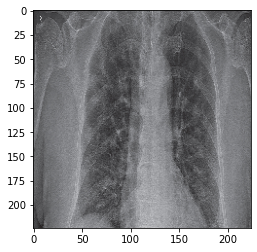

In [38]:
img = image.load_img(train_generator.filepaths[0], target_size=(224,224))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
plt.imshow(image.array_to_img(x[0]))

In [39]:
model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(),metrics=['acc'])

In [40]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=dev_generator.n//dev_generator.batch_size
############################################################################################
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=dev_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=20)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 161 steps, validate for 9 steps
Epoch 1/20
161/161 [==============================] - 54s 333ms/step - loss: 0.6742 - acc: 0.8506 - val_loss: 0.1725 - val_acc: 0.9097
Epoch 2/20
161/161 [==============================] - 50s 311ms/step - loss: 0.1946 - acc: 0.9255 - val_loss: 0.1264 - val_acc: 0.9653
Epoch 3/20
161/161 [==============================] - 50s 313ms/step - loss: 0.1793 - acc: 0.9337 - val_loss: 0.1106 - val_acc: 0.9653
Epoch 4/20
161/161 [==============================] - 52s 321ms/step - loss: 0.1648 - acc: 0.9399 - val_loss: 0.1339 - val_acc: 0.9444
Epoch 5/20
161/161 [==============================] - 53s 332ms/step - loss: 0.1463 - acc: 0.9466 - val_loss: 0.1040 - val_acc: 0.9653
Epoch 6/20
161/161 [==============================] - 54s 334ms/step - loss: 0.1199 - acc: 0.9551 - val_loss: 0.0639 - val_acc: 0.9792
Epoch 7/20
161/161 [==============================] - 54s 333ms/step - loss: 0.1031 - acc: 0.9629 

In [41]:
model.save_weights("saved_model/model-vgg-19.h5")

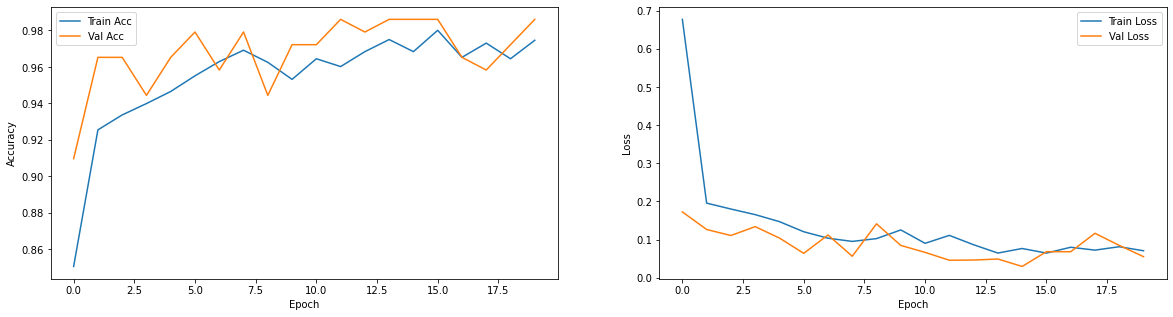

In [42]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.plot(history.history['acc'], label = 'Train Acc')
plt.plot(history.history['val_acc'], label = 'Val Acc')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('VGG-19.png')

In [43]:
filenames = test_generator.filenames
nb_samples = len(filenames)
predict = model.predict(test_generator)
preds = []
for i in range(len(predict)):
    preds.append(np.argmax(predict[i, :]))   

In [44]:
test_generator.class_indices

{'covid': 0, 'normal': 1, 'viral': 2}

In [45]:
labels = ['COVID', 'NORMAL', 'VIRAL']
cm = confusion_matrix(test_generator.classes, preds)

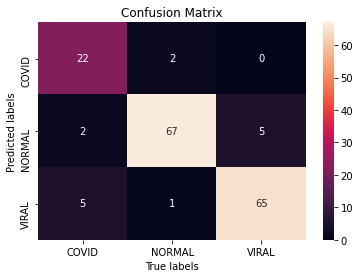

In [55]:
ax= plt.subplot()
sns.heatmap(cm.T, annot=True, ax = ax, xticklabels=labels, yticklabels=labels)
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels') 
ax.set_title('Confusion Matrix')
plt.savefig('VGG-19-cm.png')

In [56]:
print(classification_report(test_generator.classes, preds))

              precision    recall  f1-score   support

           0       0.92      0.76      0.83        29
           1       0.91      0.96      0.93        70
           2       0.92      0.93      0.92        70

    accuracy                           0.91       169
   macro avg       0.91      0.88      0.89       169
weighted avg       0.91      0.91      0.91       169

